### **The Russian real estate market has a relatively short history. In the Soviet era, all properties were state-owned; people only had the right to use them with apartments allocated based on one's place of work. As a result, options for moving were fairly limited. However, after the fall of the Soviet Union, the Russian real estate market emerged and Muscovites could privatize and subsequently sell and buy properties for the first time. Today, Russian real estate is booming. It offers many exciting opportunities and high returns for lifestyle and investment.**

### **The real estate market has been in a growth phase for several years, which means that you can still find properties at very attractive prices, but with good chances of increasing their value in the future.**

### **The scope and the objective of this problem is to analyze our data and make a model based on its features to predict the price of the Russian real estate. I hope by doing so, the model can be used to make price prediction automatically based on the apartments Russian people sell on the market and their specific features.**

#### Data source : https://www.kaggle.com/mrdaniilak/russia-real-estate-20182021 

# 1. Importing Library and Dataset

In [1]:
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
#from sklearn.pipeline import make_pipeline
#from pandas_profiling import ProfileReport
from sklearn.model_selection import KFold,ShuffleSplit,GridSearchCV

/Users/danielbeltsazar/opt/anaconda3/envs/boost/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('/Users/danielbeltsazar/DS-ML-DL Mini Projects/Real Estate Price/all_v2.csv')
df.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


### The dataset has 13 fields:

+ date - date of publication of the announcement;
+ time - the time when the ad was published;
+ geo_lat - Latitude
+ geo_lon - Longitude
+ region - Region of Russia. There are 85 subjects in the country in total.
+ building_type - Facade type. 0 - Other. 1 - Panel. 2 - Monolithic. 3 - Brick. 4 - Blocky. 5 - Wooden
+ object_type - Apartment type. 1 - Secondary real estate market; 2 - New building;
+ level - Apartment floor
+ levels - Number of storeys
+ rooms - the number of living rooms. If the value is "-1", then it means "studio apartment"
+ area - the total area of the apartment
+ kitchen_area - Kitchen area
+ price - Price. in rubles

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [4]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


# 2. Data Cleaning and Feature Engineering 

## 2.1 Missing Value

In [5]:
df.isnull().sum()

price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

## 2.2. Price Values Checking

In [6]:
df[df['price']<=0]

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
43821,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520,1,13,22,1,38.92,17.26,11
43822,-1633967296,2018-09-14,10:48:27,57.983337,56.216044,5520,1,14,22,1,38.92,17.26,11
179212,0,2018-10-01,08:59:36,53.327778,83.668570,6817,3,5,10,3,104.00,15.00,1
199895,-429242296,2018-10-04,09:21:35,55.038734,82.985600,9654,2,5,25,2,57.27,9.31,11
208483,-1744967296,2018-10-06,05:06:46,54.991330,82.882575,9654,3,4,5,2,45.00,6.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382188,-2041757296,2021-04-23,07:00:09,57.636265,39.973962,2604,3,2,4,1,41.08,9.31,11
5382595,-1794967296,2021-04-23,07:37:00,56.115619,38.416266,81,1,4,5,2,56.00,9.00,1
5398253,-1494967296,2021-04-26,05:04:58,45.111303,36.881901,2843,3,3,3,1,45.00,17.00,11
5419426,-2094967296,2021-04-27,09:05:31,58.223183,68.305352,3991,3,14,19,1,30.00,8.00,1


### Apparently we have 388 rows data where our price values are non-positive. It doesn't make sense. So i will drop it anyway.

In [7]:
df = df[df['price']>0]
df.shape

(5476618, 13)

## 2.3 Re-encoding our dataset

### Our dataset consists categorical values that have been encoded. I want to make some analysis and to do so i need to re-encode or invers encode our dataset so we can easily make further analysis and visualization.

In [8]:
df_real = df.copy()

In [9]:
df_real['building_type']= df_real['building_type'].replace([0,1,2,3,4,5],['Other','Panel','Monolithic','Brick','Blocky','Wooden'])
df_real['object_type']= df_real['object_type'].replace([1,11],['Secondary Real Estate','New Building'])


In [10]:
df_real.head()

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,Panel,8,10,3,82.6,10.8,Secondary Real Estate
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,Brick,5,24,2,69.1,12.0,Secondary Real Estate
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,Panel,5,9,3,66.0,10.0,Secondary Real Estate
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,Blocky,12,16,2,38.0,5.0,New Building
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,Brick,13,14,2,60.0,10.0,Secondary Real Estate


## 2.4. Converting time and date to datetime data type

In [11]:
df_real['date']=pd.to_datetime(df_real['date'])
df_real['time']=pd.to_datetime(df_real['time'])

In [12]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5476618 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   price          int64         
 1   date           datetime64[ns]
 2   time           datetime64[ns]
 3   geo_lat        float64       
 4   geo_lon        float64       
 5   region         int64         
 6   building_type  object        
 7   level          int64         
 8   levels         int64         
 9   rooms          int64         
 10  area           float64       
 11  kitchen_area   float64       
 12  object_type    object        
dtypes: datetime64[ns](2), float64(4), int64(5), object(2)
memory usage: 585.0+ MB


### I will divide our price value by 1 million so we can visualize it easier. It is not necessary. I do it because it will help me to visualize the price when i do some explorations.

In [13]:
df_real['price']=df_real['price']/1000000
df_real = df_real.rename(columns={'price':'price (Million)'})


In [14]:
df_real.head()

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6.05,2018-02-19,2022-03-25 20:00:21,59.805808,30.376141,2661,Panel,8,10,3,82.6,10.8,Secondary Real Estate
1,8.65,2018-02-27,2022-03-25 12:04:54,55.683807,37.297405,81,Brick,5,24,2,69.1,12.0,Secondary Real Estate
2,4.00,2018-02-28,2022-03-25 15:44:00,56.295250,44.061637,2871,Panel,5,9,3,66.0,10.0,Secondary Real Estate
3,1.85,2018-03-01,2022-03-25 11:24:52,44.996132,39.074783,2843,Blocky,12,16,2,38.0,5.0,New Building
4,5.45,2018-03-01,2022-03-25 17:42:43,55.918767,37.984642,81,Brick,13,14,2,60.0,10.0,Secondary Real Estate


## 2.5. Outlier Removing

### I usually put outlier removing process in feature preprocessing section before modelling. But this time i will do this process before we continue exploring our data. We have large dataset, it should be our concern before we do exploration and modelling.

### We will check our price data

In [15]:
df_real[df_real['price (Million)']>1000]

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
900,1451.892000,2018-09-08,2022-03-25 01:54:34,55.013994,83.003319,9654,Panel,9,10,3,59.02,45.50,New Building
908,1003.425000,2018-09-08,2022-03-25 01:54:43,55.013994,83.003319,9654,Panel,9,10,1,39.35,4.39,New Building
5215,1003.425000,2018-09-09,2022-03-25 04:00:07,55.013994,83.003319,9654,Panel,9,10,1,39.35,4.39,New Building
5224,1451.892000,2018-09-09,2022-03-25 04:00:16,55.013994,83.003319,9654,Panel,9,10,3,59.02,45.50,New Building
9890,1451.892000,2018-09-10,2022-03-25 04:35:26,55.013994,83.003319,9654,Panel,9,10,3,59.02,45.50,New Building
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5131302,1500.000000,2021-03-11,2022-03-25 09:49:14,56.121198,47.180265,3019,Brick,8,9,1,31.00,5.60,Secondary Real Estate
5217895,1096.745000,2021-03-25,2022-03-25 14:25:21,55.758177,37.592653,3,Brick,2,7,5,420.00,52.00,Secondary Real Estate
5232384,1555.032704,2021-03-29,2022-03-25 12:22:05,56.319472,44.054239,2871,Brick,2,9,3,61.50,7.30,Secondary Real Estate
5389809,1600.000000,2021-04-24,2022-03-25 09:29:19,44.839809,38.494939,2843,Brick,3,3,2,53.00,13.00,Secondary Real Estate


### Those are are really expensive apartments. They cost more than 1 billion rubels. If we look at the area or rooms or the building type of the apartments in the dataframe above, we will see that they are not so different with other apartements which have lower prices. I will check if they are outliers.

### I will use IQR method.

In [16]:
Qp11 = df_real['price (Million)'].quantile(0.25)
Qp31 = df_real['price (Million)'].quantile(0.75)
IQR1 = Qp31-Qp11

In [17]:
df_real[df_real['price (Million)']>(Qp31+(1.5*IQR1))]

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
29,11.50000,2018-04-03,2022-03-25 17:40:53,55.798921,37.738090,3,Panel,14,16,3,64.9,8.0,Secondary Real Estate
34,10.20000,2018-04-07,2022-03-25 15:23:20,55.655307,37.614605,3,Monolithic,7,14,2,52.8,10.0,Secondary Real Estate
44,11.50000,2018-04-18,2022-03-25 21:52:41,55.701330,37.507412,3,Panel,14,17,1,42.0,12.0,Secondary Real Estate
56,20.90000,2018-05-01,2022-03-25 13:33:09,55.730785,37.631424,3,Brick,6,10,3,80.0,8.2,Secondary Real Estate
59,12.00000,2018-05-12,2022-03-25 21:08:19,55.627136,37.591736,3,Panel,4,9,3,64.9,7.0,Secondary Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5476999,12.85000,2021-05-01,2022-03-25 20:13:47,55.701280,37.642654,3,Monolithic,12,24,1,41.0,9.0,Secondary Real Estate
5477001,19.73976,2021-05-01,2022-03-25 20:13:58,55.804736,37.750898,3,Panel,8,17,4,93.2,13.8,New Building
5477002,12.50316,2021-05-01,2022-03-25 20:14:01,55.841415,37.489624,3,Monolithic,17,32,2,45.9,6.6,New Building
5477004,11.83191,2021-05-01,2022-03-25 20:14:12,55.804736,37.750898,3,Panel,8,33,2,52.1,18.9,New Building


In [18]:
df_real[df_real['price (Million)']<(Qp11-(1.5*IQR1))]

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type


### According to IQR Method, there are more than 400 thousand outliers data. 

### Because we have many outliers data, i think it will be good if i drop only the outliers which have price values more than their average. I will see what is their price average and i will drop the data which have price values more than that average.

In [19]:
df_outlier = df_real[df_real['price (Million)']>(Qp31+(1.5*IQR1))]
df_outlier['price (Million)'].mean()

19.274886410994544

In [20]:
df_outlier.groupby(['building_type'])['building_type'].agg('count')

building_type
Blocky          6777
Brick         114653
Monolithic    211144
Other          26738
Panel          72759
Wooden           380
Name: building_type, dtype: int64

### The average price value of our outliers is 19.27 million rubels. From our outliers. monolithic building type dominates the outliers. I will drop the data which have price values more than around 19 million rubels.

In [21]:
df_real = df_real[df_real['price (Million)']<19]
df_real.shape

(5388250, 13)

### But after checking in the internet, the average cost of apartment of real estate in Russia is about 5000-100000 Poundsterling or more than 500 thousand rubels.

In [22]:
df_real[df_real['price (Million)']<0.5]

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
1514,0.3000,2018-09-08,2022-03-25 04:59:20,52.561070,85.234409,6817,Wooden,1,1,1,26.0,7.0,Secondary Real Estate
1596,0.4800,2018-09-08,2022-03-25 06:43:33,51.523402,81.224751,6817,Panel,1,5,1,31.0,6.0,Secondary Real Estate
1916,0.2500,2018-09-08,2022-03-25 09:08:31,48.046666,40.125644,3230,Panel,1,5,1,21.0,6.0,Secondary Real Estate
2234,0.4550,2018-09-08,2022-03-25 10:21:48,58.270120,59.706687,6171,Brick,1,2,2,49.9,3.0,Secondary Real Estate
2241,0.4500,2018-09-08,2022-03-25 10:23:33,45.508422,38.083928,2843,Panel,2,2,1,45.0,12.0,Secondary Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5474635,0.3200,2021-05-01,2022-03-25 16:18:49,55.784830,42.628058,2871,Brick,2,2,2,45.0,6.0,Secondary Real Estate
5476102,0.0063,2021-05-01,2022-03-25 18:35:48,55.926270,37.723278,81,Monolithic,15,17,1,33.0,9.4,Secondary Real Estate
5476156,0.0110,2021-05-01,2022-03-25 18:42:38,48.747428,44.509038,4695,Monolithic,18,18,1,38.0,11.0,Secondary Real Estate
5476168,0.3500,2021-05-01,2022-03-25 18:44:43,63.845328,57.299018,4417,Panel,2,5,3,59.0,6.0,Secondary Real Estate


### There are more than 17 thousand data which have price values less than 500 K rubels. They even have prices around 10 rubels, which don't make sense. I will drop them. 

In [23]:
df_real = df_real[df_real['price (Million)']>=0.5]

In [24]:
df_real.shape

(5370655, 13)

## 2.6. Additional Features

### I will add binning price feature with price condition as stated in the function below.

In [25]:
def binning_price(x):
    if x>0 and x<=5:
        p='Low'
    elif x>5 and x<10:
        p='Medium'
    else:
        p='High'
    return p

In [26]:
df_real['Price Binning']=df_real['price (Million)'].apply(binning_price)

In [27]:
df_real.head()

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,Price Binning
0,6.05,2018-02-19,2022-03-25 20:00:21,59.805808,30.376141,2661,Panel,8,10,3,82.6,10.8,Secondary Real Estate,Medium
1,8.65,2018-02-27,2022-03-25 12:04:54,55.683807,37.297405,81,Brick,5,24,2,69.1,12.0,Secondary Real Estate,Medium
2,4.00,2018-02-28,2022-03-25 15:44:00,56.295250,44.061637,2871,Panel,5,9,3,66.0,10.0,Secondary Real Estate,Low
3,1.85,2018-03-01,2022-03-25 11:24:52,44.996132,39.074783,2843,Blocky,12,16,2,38.0,5.0,New Building,Low
4,5.45,2018-03-01,2022-03-25 17:42:43,55.918767,37.984642,81,Brick,13,14,2,60.0,10.0,Secondary Real Estate,Medium


In [ ]:
##

# 3. Exploratory Data Analysis

## 3.1 Basic Exploration

### Here we see average, maximum, and minimum prices of our data in each building type and object type

In [28]:
df_real.groupby(['building_type'])['price (Million)'].agg(['mean','max','min'])

,mean,max,min
building_type,,,
Blocky,3.388761,18.999000,0.5
Brick,3.585744,18.999999,0.5
Monolithic,5.545933,18.999999,0.5
Other,4.439412,18.999000,0.5
Panel,3.159024,18.999999,0.5
Wooden,1.948708,18.999000,0.5


In [29]:
df_real.groupby(['object_type'])['price (Million)'].agg(['mean','max','min'])

,mean,max,min
object_type,,,
New Building,4.098699,18.999999,0.5
Secondary Real Estate,3.762812,18.999999,0.5


### And we can see the distribution of our price category for each building type and object type

In [30]:
df_real.groupby(['building_type','Price Binning'])['Price Binning'].agg('count')

building_type  Price Binning
Blocky         High                4586
               Low               145867
               Medium             22174
Brick          High               69582
               Low              1519117
               Medium            268816
Monolithic     High              128047
               Low               617694
               Medium            332500
Other          High               15677
               Low               214092
               Medium             71264
Panel          High               50895
               Low              1668817
               Medium            227030
Wooden         High                 223
               Low                13656
               Medium               618
Name: Price Binning, dtype: int64

In [31]:
df_real.groupby(['object_type','Price Binning'])['Price Binning'].agg('count')

object_type            Price Binning
New Building           High              101761
                       Low              1163259
                       Medium            316221
Secondary Real Estate  High              167249
                       Low              3015984
                       Medium            606181
Name: Price Binning, dtype: int64

## 3.2. Basic Visualization

## 3.2.1. Building Type

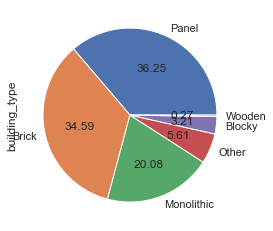

In [32]:
sns.set_theme(style='whitegrid')
df_real['building_type'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

### Here we know that our data is dominated by Panel and Brick building type data. On the other side, the wooden building type is the least. I assume that people nowadays do not like wooden style home. They prefer modern style home.

<Figure size 1080x576 with 0 Axes>

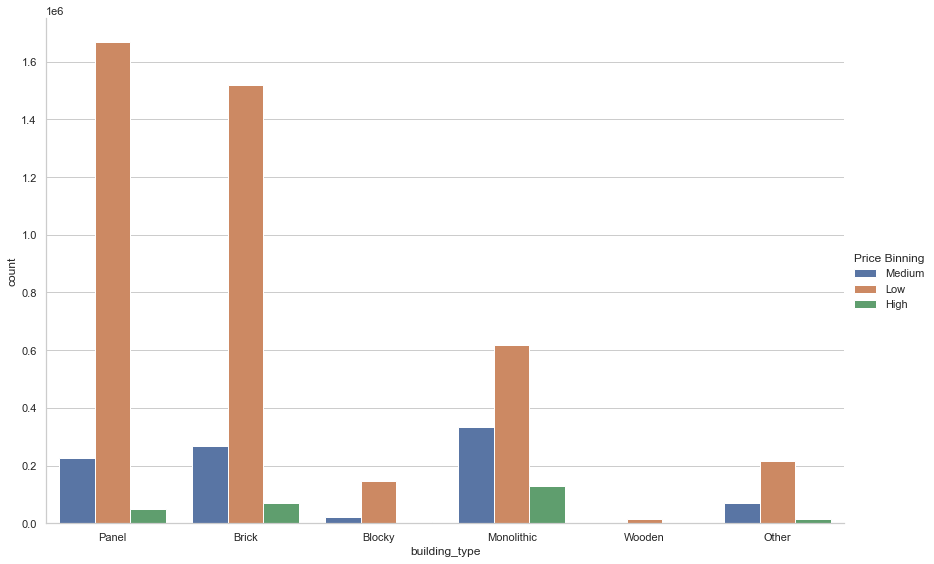

In [33]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='building_type',hue='Price Binning',data=df_real,kind="count",height=8, aspect=1.5)

<AxesSubplot:xlabel='building_type', ylabel='price (Million)'>

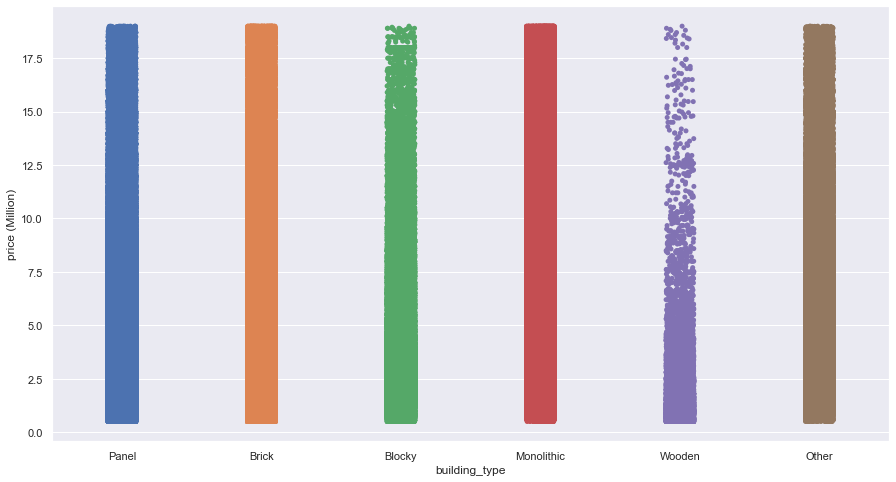

In [36]:
sns.set()
plt.figure(figsize=(15,8))
sns.stripplot(x='building_type',y='price (Million)',data=df_real)

## 3.2.2. Object Type

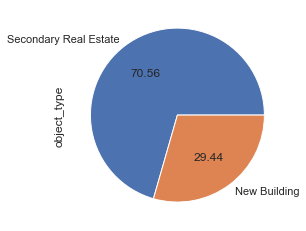

In [35]:
sns.set_theme(style='whitegrid')
df_real['object_type'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<Figure size 1080x576 with 0 Axes>

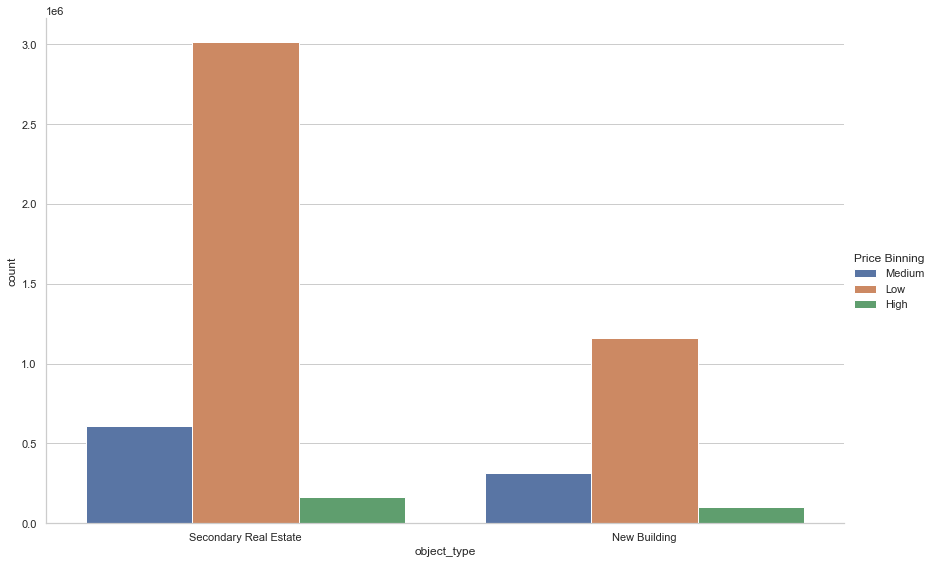

In [36]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='object_type',hue='Price Binning',data=df_real,kind="count",height=8, aspect=1.5)

<Figure size 1080x576 with 0 Axes>

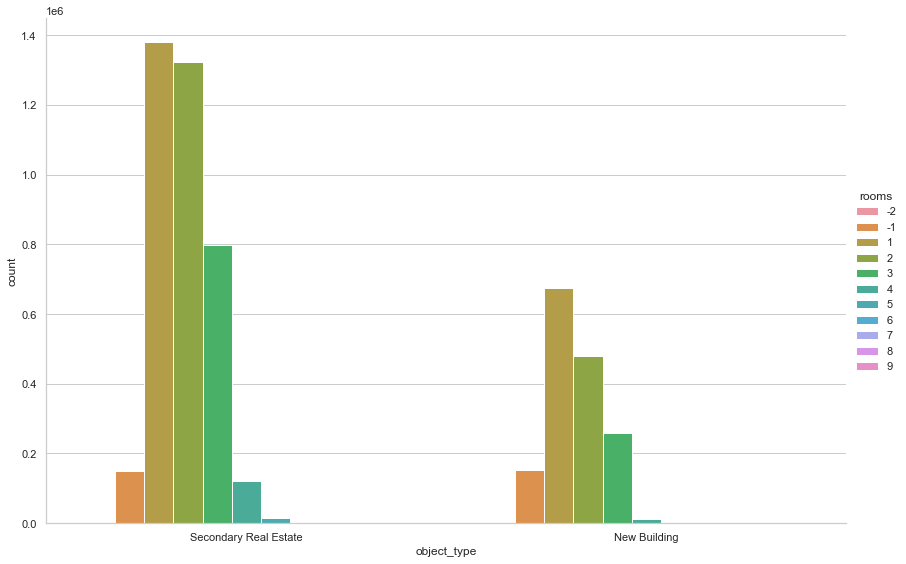

In [37]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='object_type',hue='rooms',data=df_real,kind="count",height=8, aspect=1.5)

<Figure size 1080x576 with 0 Axes>

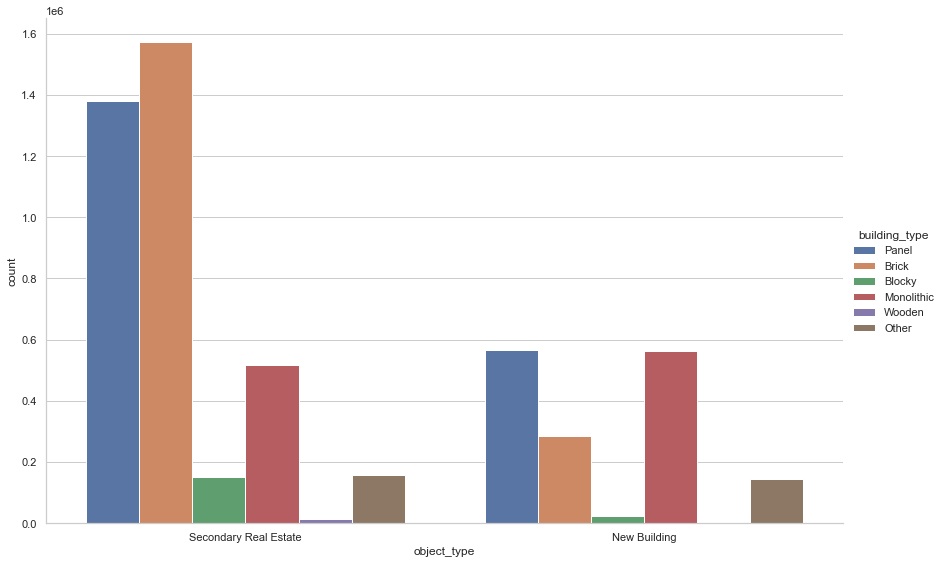

In [38]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,8))
sns.catplot(x='object_type',hue='building_type',data=df_real,kind="count",height=8, aspect=1.5)

## 3.2.3. Level, Levels, Rooms

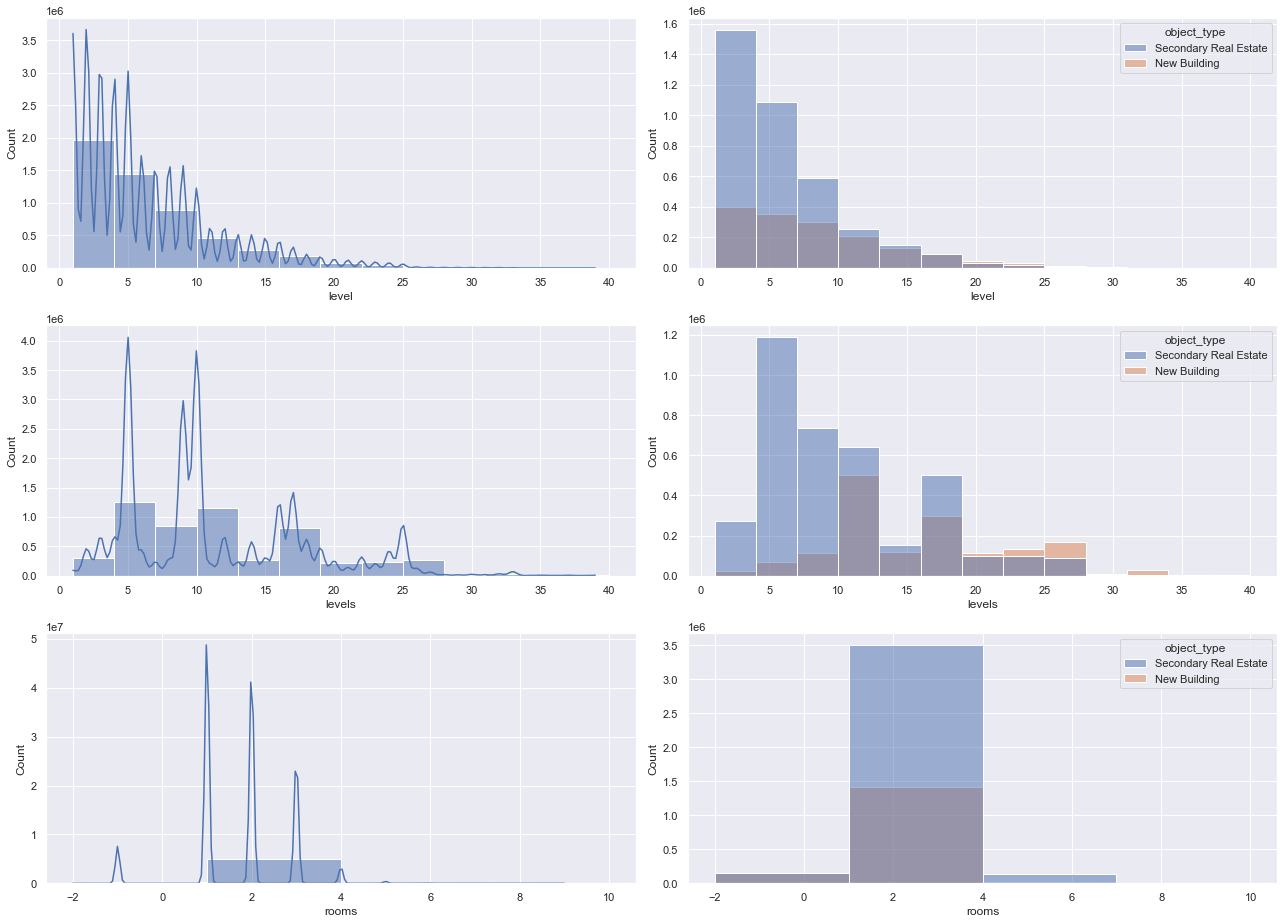

In [59]:
sns.set()
sns.set(rc = {'figure.figsize':(18,13)})
fig,axes = plt.subplots(3,2)
sns.histplot(data=df_real, x="level",binwidth=3,kde=True,ax=axes[0,0])
sns.histplot(data=df_real, x="level",binwidth=3,hue='object_type',ax=axes[0,1])
sns.histplot(data=df_real, x="levels",binwidth=3,kde=True,ax=axes[1,0])
sns.histplot(data=df_real, x="levels",binwidth=3,hue='object_type',ax=axes[1,1])
sns.histplot(data=df_real, x="rooms",binwidth=3,kde=True,ax=axes[2,0])
sns.histplot(data=df_real, x="rooms",binwidth=3,hue='object_type',ax=axes[2,1])
fig.tight_layout()


## 3.3. Statistics Visualization

<AxesSubplot:xlabel='object_type', ylabel='price (Million)'>

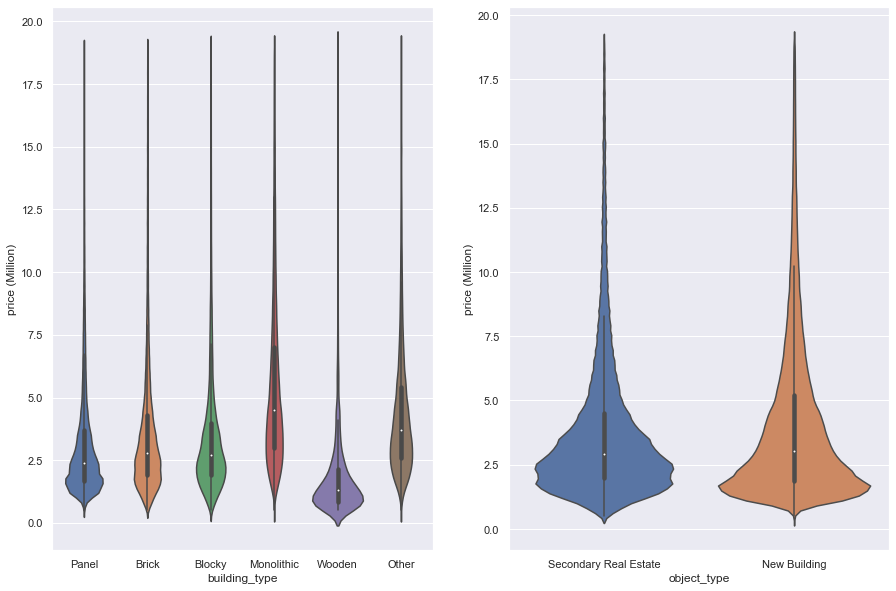

In [63]:
sns.set()
sns.set(rc = {'figure.figsize':(15,10)})

fig, axes = plt.subplots(1, 2)

sns.violinplot(data=df_real, x='building_type', y='price (Million)', ax=axes[0])
sns.violinplot(data=df_real, x='object_type', y='price (Million)', ax=axes[1])

<AxesSubplot:xlabel='object_type', ylabel='price (Million)'>

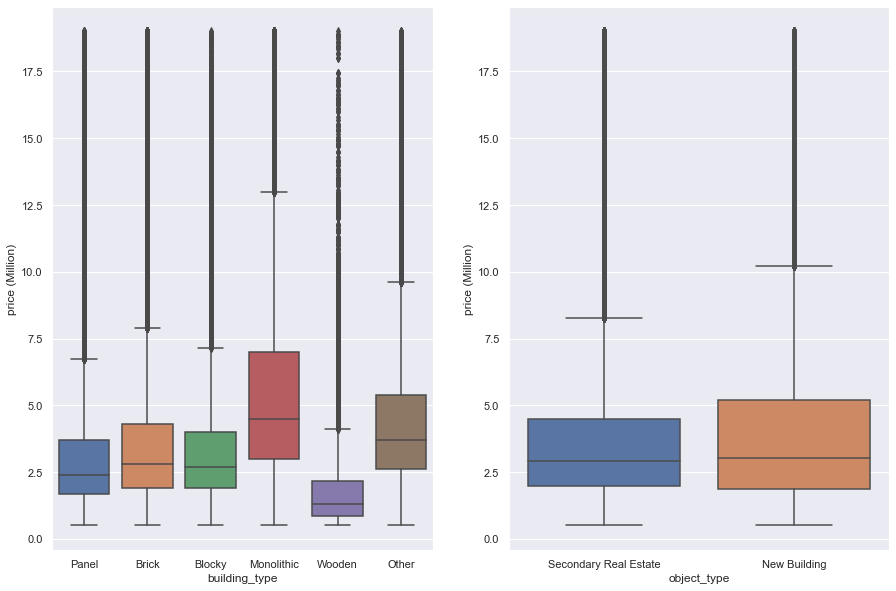

In [71]:
sns.set()
sns.set(rc = {'figure.figsize':(15,10)})

fig, axes = plt.subplots(1, 2)

#create boxplot in each subplot
sns.boxplot(data=df_real, x='building_type', y='price (Million)', ax=axes[0])
sns.boxplot(data=df_real, x='object_type', y='price (Million)', ax=axes[1])

<AxesSubplot:xlabel='object_type', ylabel='kitchen_area'>

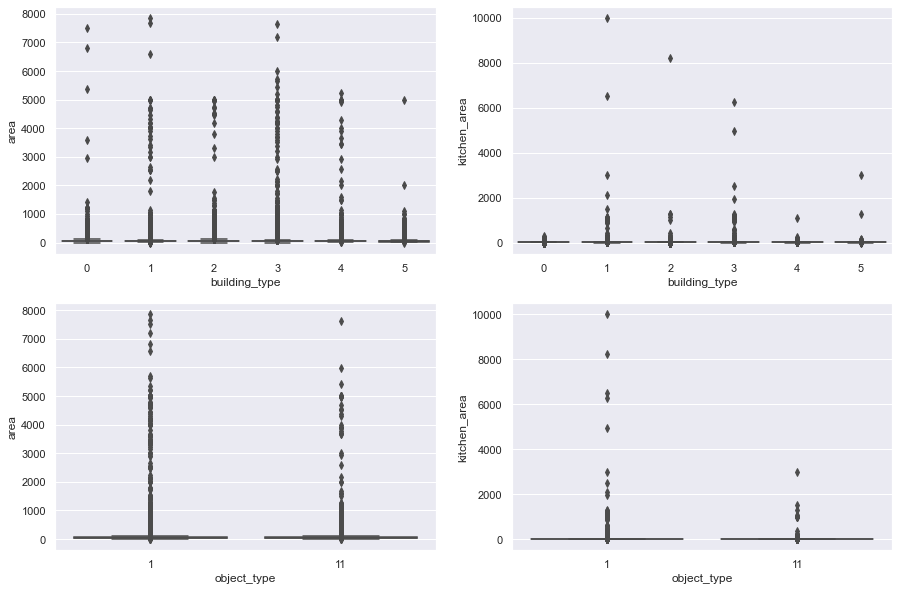

In [70]:
sns.set()

#define plotting region (2 rows, 2 columns)

fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='building_type', y='area', ax=axes[0,0])
sns.boxplot(data=df, x='building_type', y='kitchen_area', ax=axes[0,1])
sns.boxplot(data=df, x='object_type', y='area', ax=axes[1,0])
sns.boxplot(data=df, x='object_type', y='kitchen_area', ax=axes[1,1])

<AxesSubplot:xlabel='price (Million)', ylabel='area'>

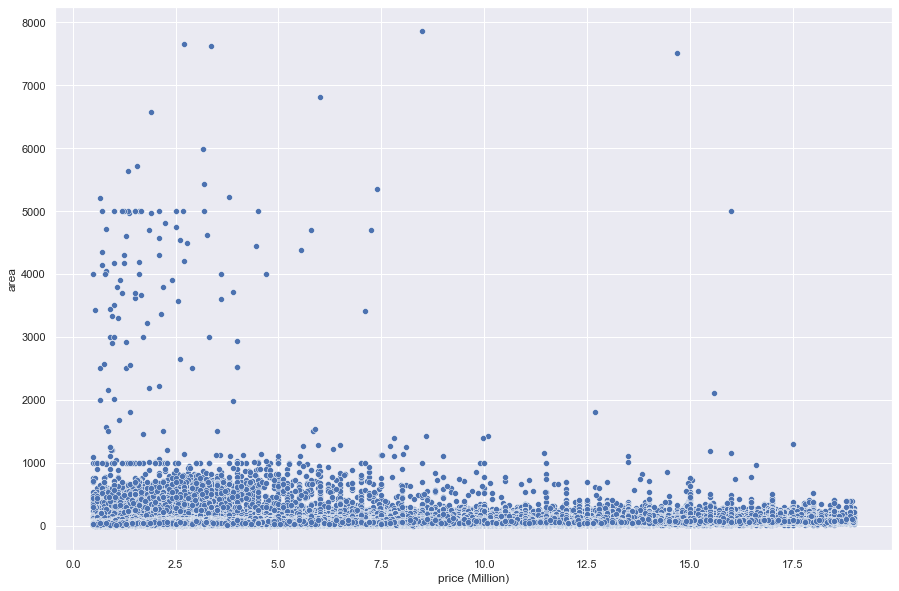

In [69]:
sns.scatterplot(y='area',x='price (Million)',data=df_real)

# 4. Feature Preprocessing

## 4.1. Label Encoding

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_encode= df_real.copy()
for col in df_encode.select_dtypes(include='O').columns:
    df_encode[col]=le.fit_transform(df_encode[col])

In [46]:
df_encode.head()

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,Price Binning
0,6.05,2018-02-19,2022-03-21 20:00:21,59.805808,30.376141,2661,4,8,10,3,82.6,10.8,1,2
1,8.65,2018-02-27,2022-03-21 12:04:54,55.683807,37.297405,81,1,5,24,2,69.1,12.0,1,2
2,4.00,2018-02-28,2022-03-21 15:44:00,56.295250,44.061637,2871,4,5,9,3,66.0,10.0,1,1
3,1.85,2018-03-01,2022-03-21 11:24:52,44.996132,39.074783,2843,0,12,16,2,38.0,5.0,0,1
4,5.45,2018-03-01,2022-03-21 17:42:43,55.918767,37.984642,81,1,13,14,2,60.0,10.0,1,2


## 4.2. Removing Unnecessary Features

In [47]:
df_encode.head()

,price (Million),date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,Price Binning
0,6.05,2018-02-19,2022-03-21 20:00:21,59.805808,30.376141,2661,4,8,10,3,82.6,10.8,1,2
1,8.65,2018-02-27,2022-03-21 12:04:54,55.683807,37.297405,81,1,5,24,2,69.1,12.0,1,2
2,4.00,2018-02-28,2022-03-21 15:44:00,56.295250,44.061637,2871,4,5,9,3,66.0,10.0,1,1
3,1.85,2018-03-01,2022-03-21 11:24:52,44.996132,39.074783,2843,0,12,16,2,38.0,5.0,0,1
4,5.45,2018-03-01,2022-03-21 17:42:43,55.918767,37.984642,81,1,13,14,2,60.0,10.0,1,2


### First i want to drop date, time, geo_lat, geo_lon features because we won't need them for now

In [48]:
df_encode = df_encode.drop(['date','time','geo_lat','geo_lon'],axis=1)
df_encode.head()

,price (Million),region,building_type,level,levels,rooms,area,kitchen_area,object_type,Price Binning
0,6.05,2661,4,8,10,3,82.6,10.8,1,2
1,8.65,81,1,5,24,2,69.1,12.0,1,2
2,4.00,2871,4,5,9,3,66.0,10.0,1,1
3,1.85,2843,0,12,16,2,38.0,5.0,0,1
4,5.45,81,1,13,14,2,60.0,10.0,1,2


### Then i want to see the correlation between our features.

<AxesSubplot:>

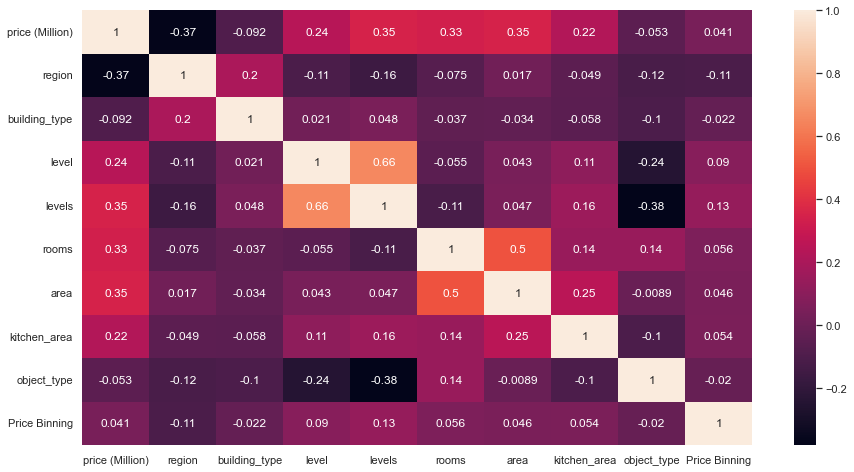

In [49]:
plt.figure(figsize=(15,8))
sns.heatmap(df_encode.corr(),annot=True)

### Apparently building type and object type of the apartments have a very weak correlation to our target value (price). I will drop or remove them.

In [50]:
df_encode = df_encode.drop(['building_type','object_type'],axis=1)
df_encode.head()

,price (Million),region,level,levels,rooms,area,kitchen_area,Price Binning
0,6.05,2661,8,10,3,82.6,10.8,2
1,8.65,81,5,24,2,69.1,12.0,2
2,4.00,2871,5,9,3,66.0,10.0,1
3,1.85,2843,12,16,2,38.0,5.0,1
4,5.45,81,13,14,2,60.0,10.0,2


# 5. Regression Model

## 5.1. Basic Models (Linear Regression, Ridge Regression, Random Forest Regressor, and Extreme Gradient Boosting Regression (XGBoost))

In [51]:
X = df_encode.drop(['price (Million)','Price Binning'],axis=1).values
y = df_encode['price (Million)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [52]:
# Linear regression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [53]:
# Ridge regression

ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [54]:
# Random Forest Regression

rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=125, min_samples_leaf=125, max_samples=0.9, max_leaf_nodes=150, max_features=5, max_depth=35)
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=35, max_features=5, max_leaf_nodes=150,
                      max_samples=0.9, min_samples_leaf=125, n_estimators=125,
                      n_jobs=-1, random_state=42)

In [55]:
# XGB 

xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
def check_metrics(model):
  print('Training MAE', mean_absolute_error(y_train, model.predict(X_train)))
  print('Validation MAE', mean_absolute_error(y_test, model.predict(X_test)))
  print('Validation R^2', model.score(X_test, y_test))
  print()


models = [reg, ridge, rf,xgb]

for m in models:
  check_metrics(m)

Training MAE 1.5720550176633654
Validation MAE 1.5728589580746253
Validation R^2 0.38506737021676485

Training MAE 1.5720549971670423
Validation MAE 1.5728589373253636
Validation R^2 0.3850673701737378

Training MAE 0.921268131165873
Validation MAE 0.9207976545941385
Validation R^2 0.7648514958795883

Training MAE 0.8120713896700072
Validation MAE 0.8137367951384396
Validation R^2 0.8054078495297043



### From our basic models, we got the best R Squared score from XGBoost Regressor with R Squared of 0.805 and Validation Mean Absolute Error (MAE) of 0.813. These results are not quite satisfying. I will try using K-Fold to our models.

## 5.2. Models with GridSearchCV and Cross Validation

In [69]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.382311,{'normalize': True}
1,lasso,0.339031,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.784120,"{'criterion': 'mse', 'splitter': 'best'}"
